In [3]:
import time 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random
import datetime
import csv


In [ ]:
from playwright.async_api import async_playwright


In [ ]:
playwright = await async_playwright().start()
browser = await playwright.chromium.launch(headless = False)


In [ ]:
browser.new_page()

In [ ]:
browser.new_page()
page = await browser.new_page()


In [ ]:
#new jupyter notebook to scrape the list of date and the corresponding website link

my_url_sample = 'http://sousuo.gov.cn/column/40403/0.htm'
requests = requests.get(my_url_sample)
soup = BeautifulSoup(requests.text, 'html.parser')

In [ ]:
covid_daily_announcement = soup.find_all('ul', class_ = 'listTxt')
covid_daily_announcement = covid_daily_announcement[0].find_all('a')
covid_daily_announcement
# len(covid_daily_announcement)

# daily_announce_links = [i['href'] for i in covid_daily_announcement[0].find_all('a')]
# daily_announce_titles = [i.text for i in covid_daily_announcement[0].find_all('a')]



In [ ]:
# for single page:

links_per_page = []
for i in range(0, len(covid_daily_announcement)):
    daily_pair  = {}
    daily_pair['date'] = ''
    daily_pair['title'] = covid_daily_announcement[i].text
    daily_pair['link'] = covid_daily_announcement[i]['href']
    if '新冠病毒疫苗接种情况' in daily_pair['title']:
        daily_pair['date'] = daily_pair['link'][25:35]
        daily_pair['date'] = datetime.datetime.strptime(daily_pair['date'], '%Y-%m/%d').date()
        print(daily_pair)
        links_per_page.append(daily_pair)
links_per_page



In [ ]:
# to csv
with open('daily_links.csv', 'w', newline='') as csvfile:
    fieldnames = ['date', 'title', 'link']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(0, len(links_per_page)):
        writer.writerow(links_per_page[i])


In [ ]:
# for multiple pages:
import requests
import pandas as pd
import random
import datetime
import csv
from bs4 import BeautifulSoup
import time

all_links = []
page_number = list(range(0,1))

for page in page_number:
    my_url = 'http://sousuo.gov.cn/column/40403/' + str(page) + '.htm'
    response = requests.get(my_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    covid_daily_announcement = soup.find_all('ul', class_ = 'listTxt')
    covid_daily_announcement = covid_daily_announcement[0].find_all('a')
    links_per_page = []
    for i in range(0, len(covid_daily_announcement)):
        daily_pair  = {}
        daily_pair['date'] = ''
        daily_pair['title'] = covid_daily_announcement[i].text
        daily_pair['link'] = covid_daily_announcement[i]['href']
        if '新冠病毒疫苗接种情况' in daily_pair['title']:
            daily_pair['date'] = daily_pair['link'][25:35]
            daily_pair['date'] = datetime.datetime.strptime(daily_pair['date'], '%Y-%m/%d').date()
            print(daily_pair)
            links_per_page.append(daily_pair)
            # write to csv
            with open('links.csv', 'a', newline='') as csvfile:
                fieldnames = ['date', 'title', 'link']
                writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
                writer.writerow(daily_pair)
    all_links.append(links_per_page)
    time.sleep(random.randint(1,3))

all_links

In [ ]:
df = pd.read_csv('links.csv', index_col = 0, names=['date', 'title', 'link'])

In [ ]:
df.link[0]

In [ ]:
# from playwright.async_api import async_playwright

# playwright = await async_playwright().start()
# browser = await playwright.chromium.launch(headless = False)
# browser.new_page()
# page = await browser.new_page()

In [ ]:
import requests

cookies = {
    'sVoELocvxVW0S': '5SCfB82xekZkf1z8Llz4svA6L2nTZOG34XN5ZPdjmB3YqtlpAs25wB.4N16YWlv697kIeWi_XBteAfB4CfWfLka',
    'yfx_c_g_u_id_10006654': '_ck22112421261414475334743259433',
    'wzws_sessionid': 'gTg2ZWE4MqBjiqIegjkwZGE0YoAxNTguMjIyLjE5OC4xMTk=',
    'insert_cookie': '96260894',
    'arialoadData': 'true',
    'ariawapChangeViewPort': 'false',
    '_gscu_2059686908': '70906610vucb9d20',
    '_gscbrs_2059686908': '1',
    '_gscs_2059686908': 't7096304056jq0t21|pv:4',
    'yfx_f_l_v_t_10006654': 'f_t_1669343174444__r_t_1670955302867__v_t_1670964763818__r_c_5',
    'sVoELocvxVW0T': '53yOv1bi3y07qqqDmkVIH6abNj0r12rL3ihoINS0zjXgWcthFQYfMB..61r7_ZASkklECD1Seo7y0gCjlDzTBvJOTvXRLApPl4jUbPbM5J6724EpverDNgUPLTZjdABRL8chgsrSIAWNtFONAsEyuCyoEuq6prdTryeRl7cEDjhXANNfgTPMFbYi0drG5bE7hcojhdrKMIoSVi34u8kF7SgwmT0fVy8dYx1LRDul2KTpwkt_wixphix7psIkg35rzeTeOmtSFFSzBzYR.mHikd1wi8lEREfGXF5YuTXjnrZKkHDR3ivqhOAM6wc39Alu_.RSNMkLo5EaH0HBNqJ.IWa',
}

headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'Accept-Language': 'en-US,en;q=0.9,zh-CN;q=0.8,zh-TW;q=0.7,zh;q=0.6',
    'Connection': 'keep-alive',
    # 'Cookie': 'sVoELocvxVW0S=5SCfB82xekZkf1z8Llz4svA6L2nTZOG34XN5ZPdjmB3YqtlpAs25wB.4N16YWlv697kIeWi_XBteAfB4CfWfLka; yfx_c_g_u_id_10006654=_ck22112421261414475334743259433; wzws_sessionid=gTg2ZWE4MqBjiqIegjkwZGE0YoAxNTguMjIyLjE5OC4xMTk=; insert_cookie=96260894; arialoadData=true; ariawapChangeViewPort=false; _gscu_2059686908=70906610vucb9d20; _gscbrs_2059686908=1; _gscs_2059686908=t7096304056jq0t21|pv:4; yfx_f_l_v_t_10006654=f_t_1669343174444__r_t_1670955302867__v_t_1670964763818__r_c_5; sVoELocvxVW0T=53yOv1bi3y07qqqDmkVIH6abNj0r12rL3ihoINS0zjXgWcthFQYfMB..61r7_ZASkklECD1Seo7y0gCjlDzTBvJOTvXRLApPl4jUbPbM5J6724EpverDNgUPLTZjdABRL8chgsrSIAWNtFONAsEyuCyoEuq6prdTryeRl7cEDjhXANNfgTPMFbYi0drG5bE7hcojhdrKMIoSVi34u8kF7SgwmT0fVy8dYx1LRDul2KTpwkt_wixphix7psIkg35rzeTeOmtSFFSzBzYR.mHikd1wi8lEREfGXF5YuTXjnrZKkHDR3ivqhOAM6wc39Alu_.RSNMkLo5EaH0HBNqJ.IWa',
    'DNT': '1',
    'Referer': 'http://www.nhc.gov.cn/xcs/yqjzqk/list_gzbd_26.shtml',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
}

response = requests.get('http://www.nhc.gov.cn/xcs/yqjzqk/list_gzbd_27.shtml', cookies=cookies, headers=headers, verify=False)

In [ ]:
response.headers
soup = BeautifulSoup(response.text, 'html.parser')

ml = soup.find_all('li')

for link in ml:
    single_row  = {'date':'', 'title':'', 'link':''}
    single_row['date'] = pd.to_datetime(link.span.text).date()+datetime.timedelta(days=-1)
    single_row['title'] = link.a.text
    single_row['link'] = 'http://www.nhc.gov.cn'+link.a['href']
    print(single_row)
    #write to csv
    with open('data.csv', 'a', newline='') as csvfile:
        fieldnames = ['date', 'title', 'link']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writerow(single_row)



In [ ]:
vaccine_link = pd.read_csv('data.csv')


In [ ]:
vaccine_link.value_counts().sort_index

In [ ]:
url = 'http://www.nhc.gov.cn/jkj/s7915/202110/d43226f89b3f4977813f35bd6b9acd2b.shtml'

import asyncio
from pyppeteer import launch

import time 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random
import datetime
import csv

import os
import asyncio
from pyppeteer import launch
from bs4 import BeautifulSoup

import nest_asyncio
nest_asyncio.apply()


In [ ]:
from playwright.sync_api import sync_playwright

import re
from playwright.sync_api import Page, expect
import undetected_chromedriver as uc
import time
import random


In [ ]:
url = 'http://www.nhc.gov.cn/jkj/s7915/202110/d43226f89b3f4977813f35bd6b9acd2b.shtml'


In [ ]:
driver = uc.Chrome()
driver.get(url)


In [ ]:
content = BeautifulSoup(driver.page_source, 'html.parser')
text = content.find('p').text

In [ ]:
print(text)
# get date
text_date = re.findall(r'(\d{4}年\d{1,2}月\d{1,2}日)', text)
print(text_date)


In [ ]:
text_extract = text[20:]
print(text_extract)

text_num = re.findall(r'(\d+\.\d+)', text_extract)

text_num = text_num[0]
text_num = int(float(text_num)*10000)
print(text_num)

In [ ]:
data_file = pd.read_csv('data.csv', index_col=0, parse_dates=True, names = ['date', 'title', 'link'])
data_file = data_file.sort_index(ascending=False)
data_file = data_file.drop_duplicates()
data_file = data_file.reset_index()
data_file.head()
data_file.link[4]

# Main scraping codes

In [ ]:
new_file = []
i = 0

for single_link in data_file['link'][:616]:
    print(single_link)
    single_row = {}
    driver.get(single_link)
    content = BeautifulSoup(driver.page_source, 'html.parser')
    page_text = content.find('p').text
    text_date = re.findall(r'(\d{4}年\d{1,2}月\d{1,2}日)', page_text)[0]
    text_extract = page_text[20:]
    text_num = re.findall(r'(\d+\.\d+)', text_extract)
    text_num = text_num[0]
    vaccine_num = int(float(text_num)*10000)
    print(f'Printing page {i+1}:', text_date, vaccine_num)
    print(datetime.datetime.now())
    print('-----------------')

    single_row['date'] = data_file.date[i].date()
    single_row['text_date'] = text_date
    single_row['vaccine_num'] = vaccine_num
    single_row['title'] = data_file.title[i]
    single_row['link'] = single_link
    new_file.append(single_row)
    i += 1

    time.sleep(random.randint(1,3))
    #write to a new csv file
    with open('china_vaccination.csv', 'a', newline='') as csvfile:
        fieldnames = ['date', 'text_date', 'vaccine_num', 'title', 'link']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writerow(single_row)
    

In [26]:
df = pd.read_csv('china_vaccination.csv', index_col=0, parse_dates=True, names = ['date', 'text_date', 'vaccine_num', 'title', 'link'])
df.dtypes
df = df.sort_index(ascending=False)
df = df.drop_duplicates()
df = df.reset_index()
df.head()

,date,text_date,vaccine_num,title,link
0,2022-12-12,2022年12月12日,3450244000,新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202212/e2b3e8...
1,2022-12-11,2022年12月11日,3448992000,新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202212/d549a7...
2,2022-12-10,2022年12月10日,3448175000,新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202212/bdf099...
3,2022-12-09,2022年12月9日,3447152000,新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202212/32d1b1...
4,2022-12-08,2022年12月8日,3446141000,新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202212/91e927...


In [35]:
df.tail()

,date,text_date,vaccine_num,title,link,vaccine_num_daily
624,2021-03-28,2021年3月28日,106613000,全国新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202103/06db88...,0
625,2021-03-27,2021年3月27日,102417000,全国新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202103/575af2...,0
626,2021-03-26,2021年3月26日,97470000,全国新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202103/0e5bf6...,0
627,2021-03-25,2021年3月25日,91346000,全国新冠病毒疫苗接种情况,http://www.nhc.gov.cn/jkj/s7915/202103/0d1b93a...,0
628,2021-03-25,2021年3月24日,85989700,全国新冠病毒疫苗接种情况,http://www.nhc.gov.cn/jkj/s7915/202103/1d85a9a...,0


In [37]:
for i in range(len(df)):
    if i == len(df)-1:
        df['vaccine_num_daily'][i] = 0
        break
    else:
        df['vaccine_num_daily'][i] = df['vaccine_num'][i] - df['vaccine_num'][i+1]

df.head()

/var/folders/j_/_3yzbdjs3ylf4k27zrqrssqc0000gp/T/ipykernel_83880/1768666765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vaccine_num_daily'][i] = df['vaccine_num'][i] - df['vaccine_num'][i+1]
/var/folders/j_/_3yzbdjs3ylf4k27zrqrssqc0000gp/T/ipykernel_83880/1768666765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vaccine_num_daily'][i] = 0


,date,text_date,vaccine_num,title,link,vaccine_num_daily
0,2022-12-12,2022年12月12日,3450244000,新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202212/e2b3e8...,1252000
1,2022-12-11,2022年12月11日,3448992000,新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202212/d549a7...,817000
2,2022-12-10,2022年12月10日,3448175000,新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202212/bdf099...,1023000
3,2022-12-09,2022年12月9日,3447152000,新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202212/32d1b1...,1011000
4,2022-12-08,2022年12月8日,3446141000,新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202212/91e927...,739000


In [40]:
df.tail()
df.to_csv('china_vaccination_daily.csv')


In [37]:
df = pd.read_csv('china_vaccination_daily.csv', index_col=0, parse_dates=True, names = ['date', 'text_date', 'vaccine_num', 'title', 'link', 'vaccine_num_daily'])
df
df.dtypes



date                 object
text_date            object
vaccine_num           int64
title                object
link                 object
vaccine_num_daily     int64
dtype: object

In [40]:
df.sort_values(by='date', ascending=True)

,date,text_date,vaccine_num,title,link,vaccine_num_daily
628,2021-03-25,2021年3月24日,85989700,全国新冠病毒疫苗接种情况,http://www.nhc.gov.cn/jkj/s7915/202103/1d85a9a...,0
627,2021-03-25,2021年3月25日,91346000,全国新冠病毒疫苗接种情况,http://www.nhc.gov.cn/jkj/s7915/202103/0d1b93a...,5356300
626,2021-03-26,2021年3月26日,97470000,全国新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202103/0e5bf6...,6124000
625,2021-03-27,2021年3月27日,102417000,全国新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202103/575af2...,4947000
624,2021-03-28,2021年3月28日,106613000,全国新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202103/06db88...,4196000
...,...,...,...,...,...,...
4,2022-12-08,2022年12月8日,3446141000,新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202212/91e927...,739000
3,2022-12-09,2022年12月9日,3447152000,新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202212/32d1b1...,1011000
2,2022-12-10,2022年12月10日,3448175000,新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202212/bdf099...,1023000
1,2022-12-11,2022年12月11日,3448992000,新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202212/d549a7...,817000


In [41]:
df['date'] = pd.to_datetime(df['date'])
df['vaccine_num'] = df['vaccine_num'].astype(int)
df['vaccine_num_daily'] = df['vaccine_num_daily'].astype(int)
df.dtypes


date                 datetime64[ns]
text_date                    object
vaccine_num                   int64
title                        object
link                         object
vaccine_num_daily             int64
dtype: object

,date,text_date,vaccine_num,title,link,vaccine_num_daily,vaccine_num_rolling
0,2022-12-12,2022年12月12日,3450244000,新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202212/e2b3e8...,1252000,NaN
1,2022-12-11,2022年12月11日,3448992000,新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202212/d549a7...,817000,NaN
2,2022-12-10,2022年12月10日,3448175000,新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202212/bdf099...,1023000,NaN
3,2022-12-09,2022年12月9日,3447152000,新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202212/32d1b1...,1011000,NaN
4,2022-12-08,2022年12月8日,3446141000,新冠病毒疫苗接种情况,http://www.nhc.gov.cn/xcs/yqjzqk/202212/91e927...,739000,NaN


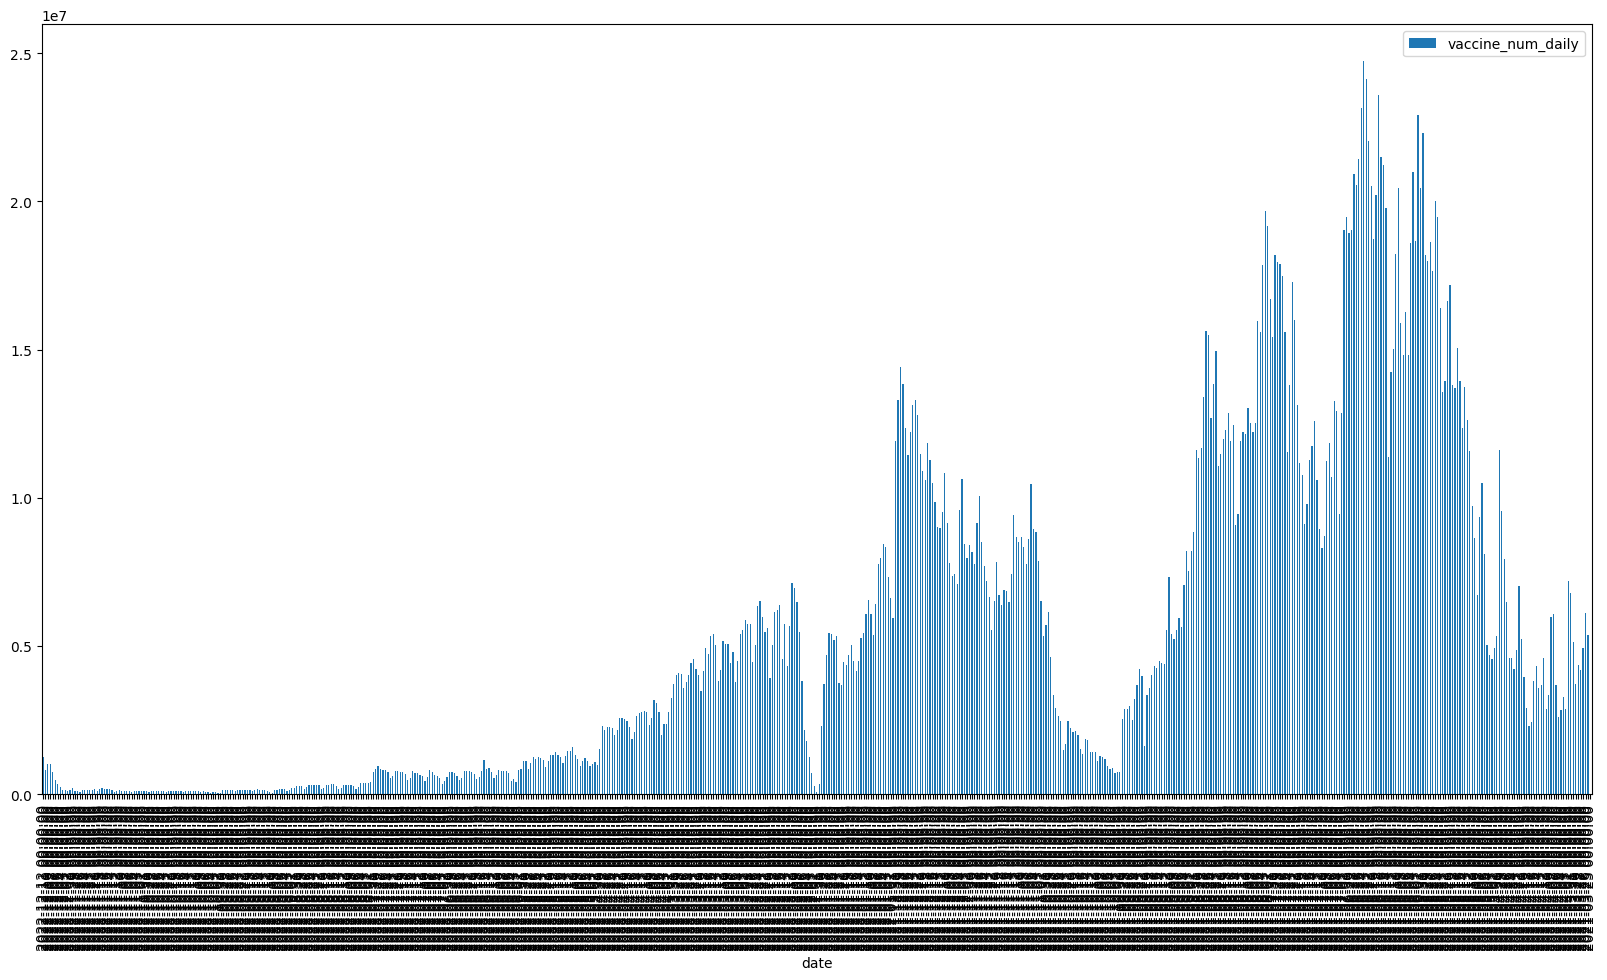

In [42]:
# plot data and daily vaccine number
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
import datetime

df.plot.bar(x='date', y='vaccine_num_daily', rot=90, figsize=(20,10))

#geting a rolling average of 7 days
df['vaccine_num_rolling'] = df['vaccine_num_daily'].rolling(7).mean()
df.head()



In [42]:
df.dtypes

date                   datetime64[ns]
text_date                      object
vaccine_num                     int64
title                          object
link                           object
vaccine_num_daily               int64
vaccine_num_rolling           float64
dtype: object

<AxesSubplot: xlabel='date'>

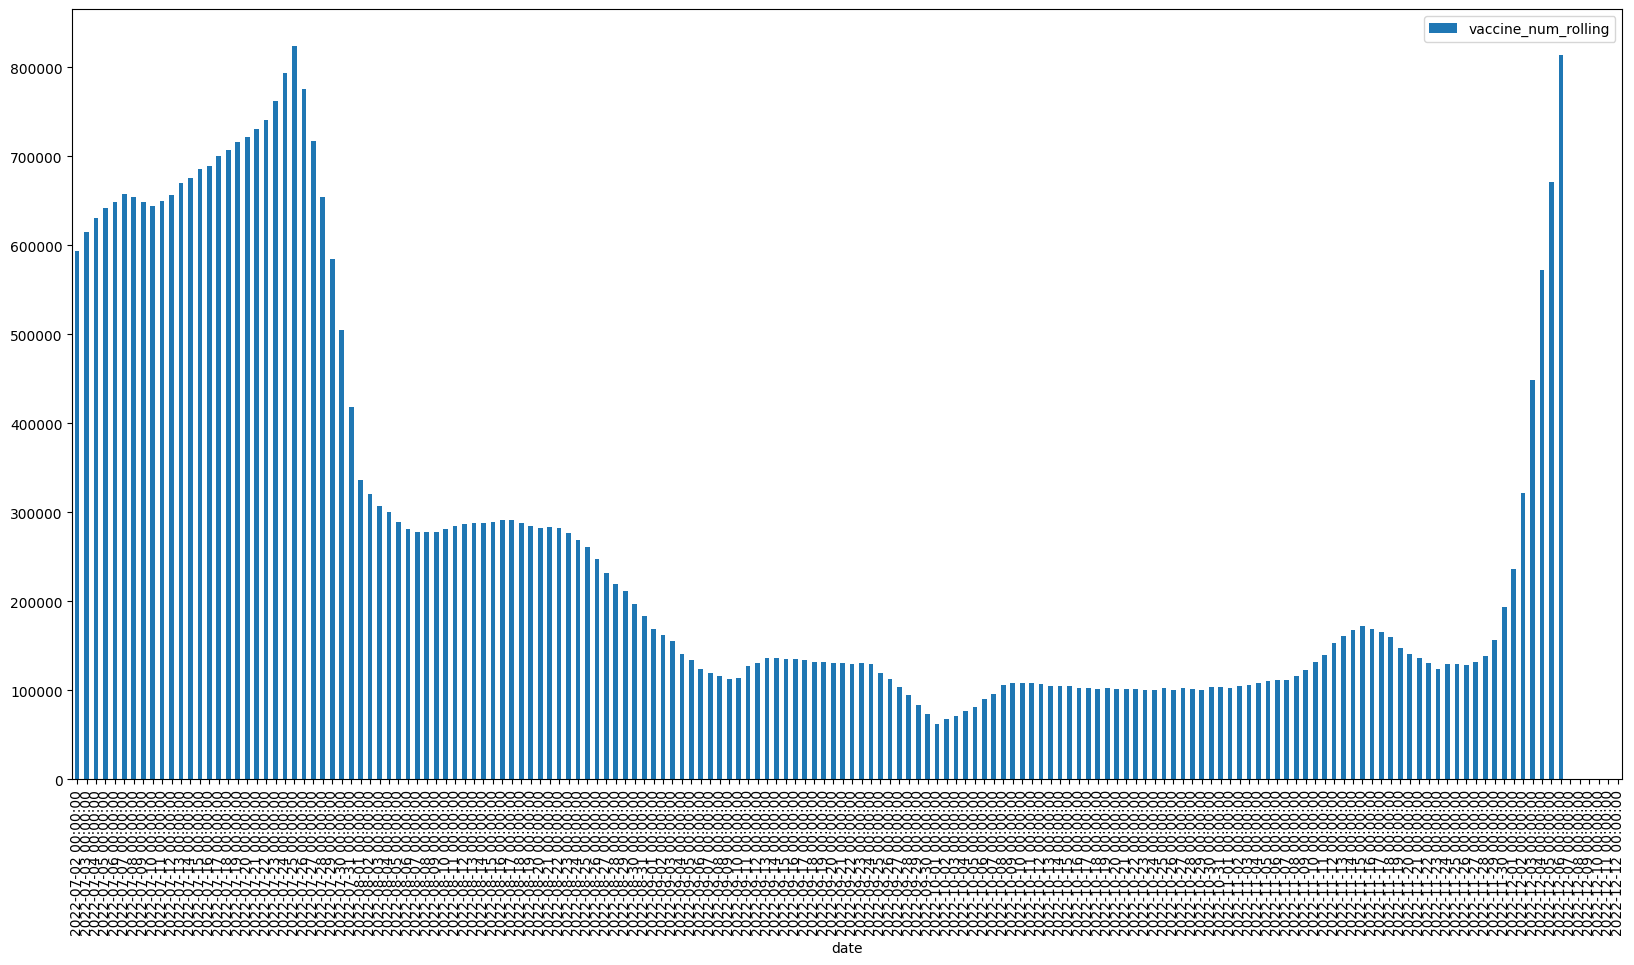

In [45]:
#only plot data after 2022-07-01
df_2 = df[df['date'] > '2022-07-01']
df_2.head()

df_2 = df_2[::-1]
df_2.plot.bar(x='date', y='vaccine_num_rolling', rot=90, figsize=(20,10))
